In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit,ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Leitura dos dados

In [100]:
df_original = pd.read_csv('solar-flare.csv', header = None, skiprows = 1, sep = ' ')
print("Dados")
print("Número de linhas: {}\nNúmero de colunas: {}".format(df_original.shape[0], df_original.shape[1]))

Dados
Número de linhas: 1066
Número de colunas: 13


Impressão das primeiras e últimas 10 amostras do conjunto de dados

In [30]:
df_original.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
5,C,A,O,1,2,1,1,2,1,1,0,0,0
6,B,X,O,1,3,1,1,2,1,1,0,0,0
7,C,A,O,1,3,1,1,2,1,1,0,0,0
8,C,A,O,1,2,1,1,2,1,1,1,0,0
9,B,X,O,1,3,1,1,2,1,1,0,0,0


In [31]:
df_original.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
1056,H,S,X,1,2,1,1,2,1,1,1,0,0
1057,D,S,O,1,2,1,2,2,1,1,0,0,0
1058,H,S,X,1,2,2,2,2,1,1,0,0,0
1059,H,S,X,2,2,1,1,2,1,1,0,0,0
1060,D,R,O,1,3,1,1,2,1,1,0,0,0
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0
1065,B,X,O,1,1,1,1,2,1,1,0,0,0


Para facilitar a manipulação dos dados, separamos a coluna composta por todos os dados em 13 colunas de nomes correspondentes a seus significados. O significado de cada valor foi retirado da fonte da base, disponível em https://archive.ics.uci.edu/ml/datasets/Solar+Flare



In [32]:
df_original = df_original.rename(
                {0: "class_code", 1: "largest_spot_size", 2: "spot_distribution",
                 3: "activity", 4: "evolution", 5: "24_flare_activity", 6: "historically_complex",
                 7: "region_become_hcomplex", 8: "area", 9: "largest_spot_area", 10: "c_class",
                 11: "m_class", 12: "x_class"}, axis='columns')

df_original.head(10)

,class_code,largest_spot_size,spot_distribution,activity,evolution,24_flare_activity,historically_complex,region_become_hcomplex,area,largest_spot_area,c_class,m_class,x_class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
5,C,A,O,1,2,1,1,2,1,1,0,0,0
6,B,X,O,1,3,1,1,2,1,1,0,0,0
7,C,A,O,1,3,1,1,2,1,1,0,0,0
8,C,A,O,1,2,1,1,2,1,1,1,0,0
9,B,X,O,1,3,1,1,2,1,1,0,0,0


# Conversão os atributos categóricos para numéricos

In [33]:
colunas_dummy=df_original.columns[:-3]
df_dummies=pd.get_dummies(df_original,columns=colunas_dummy)

In [34]:
df_dummies.head()

,c_class,m_class,x_class,class_code_B,class_code_C,class_code_D,class_code_E,class_code_F,class_code_H,largest_spot_size_A,...,24_flare_activity_1,24_flare_activity_2,24_flare_activity_3,historically_complex_1,historically_complex_2,region_become_hcomplex_1,region_become_hcomplex_2,area_1,area_2,largest_spot_area_1
0,0,0,0,0,0,0,0,0,1,1,...,1,0,0,1,0,1,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,1,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,1


In [67]:
df_dummies.tail()

,c_class,m_class,x_class,class_code_B,class_code_C,class_code_D,class_code_E,class_code_F,class_code_H,largest_spot_size_A,...,24_flare_activity_1,24_flare_activity_2,24_flare_activity_3,historically_complex_1,historically_complex_2,region_become_hcomplex_1,region_become_hcomplex_2,area_1,area_2,largest_spot_area_1
1061,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,1
1062,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,1
1063,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
1064,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,1,0,1
1065,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,1


# Centering and scaling

In [68]:
y=df_dummies.iloc[:,:3]
X=df_dummies.iloc[:,3:]
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [97]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (1066, 31)
y shape: (1066, 3)


# PCA

Text(0, 0.5, 'cumulative explained variance')

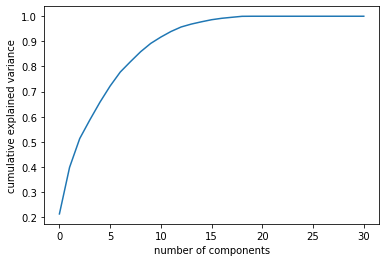

In [70]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [71]:
def select_n_comp(lista,var):
    n_comp=0
    for i in lista:
        if i <= var:
            n_comp += 1
    return n_comp

print('O número de componentes para 90% da variância é:',select_n_comp(np.cumsum(pca.explained_variance_ratio_),0.9))

O número de componentes para 90% da variância é: 10


In [72]:
n_comp=select_n_comp(np.cumsum(pca.explained_variance_ratio_),0.9)
pca=PCA(n_components=n_comp)
df_pca=pca.fit_transform(df_centered)
df_pca.shape

(1066, 10)

# Validação cruzada e regressão linear

In [102]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = ShuffleSplit(n_splits=repeats,test_size=0.7)
    # create model
    model = LinearRegression()
    # evaluate model
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse =  np.sqrt(np.mean(np.absolute(scores)))
    return rmse

In [114]:
y_c = y.iloc[:,0]
y_m = y.iloc[:,1]
y_x = y.iloc[:,2]
scores=evaluate_model(X,y_c,2)

In [115]:
scores

3001329638097.541

In [98]:
y.iloc[:,0].value_counts()

0    884
1    112
2     33
3     20
4      9
5      4
6      3
8      1
Name: c_class, dtype: int64